# TODO
- (argmax, max) per speedup e scalabilita
- qualcosa vs dimensione collezione (n) per vedere la gustafson legge

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [97]:
results_df = pd.read_csv("../Statistics/service_time_trial.csv")
results_df.head()

,max_nw,active_workers_history,service_time_history,service_time_goal,emitter_elapsed_time_history,workers_elapsed_time_history,collector_elapsed_time_history
0,8,8,1142,100,12,2538,2572
1,8,8,315,100,6,2552,0
2,8,4,52,100,320,187,261
3,8,3,74,100,4,285,25
4,8,3,99,100,5,300,8


### Service Time History

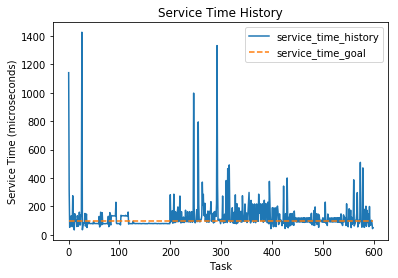

In [98]:
# plot servive_time_history vs service_time_goal
results_df.plot(y=['service_time_history', 'service_time_goal'],
                style=['-', '--'])
plt.ylabel('Service Time (microseconds)')
plt.xlabel('Task')
plt.title('Service Time History')
plt.show()

### Service Time Error

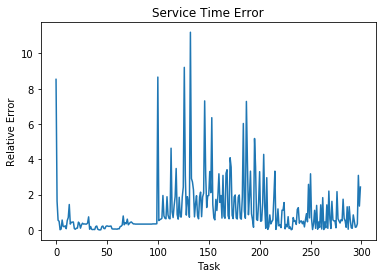

In [99]:
# plot relative error between  service_time_goal and service_time_history
y1 = np.array(results_df['service_time_history'])
y2 = np.array(results_df['service_time_goal'])

relative_error = (y1-y2)/y2

plt.plot(abs_relative_error, label='absoulute')
plt.ylabel('Relative Error')
plt.xlabel('Task')
plt.title('Service Time Error')
plt.show()

### Parallelism Degree

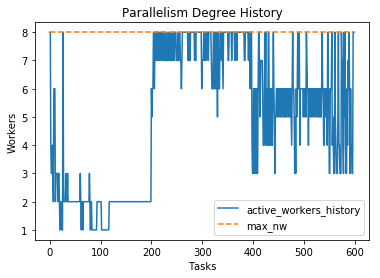

In [100]:
# plot parallelism degree vs max nw
results_df.plot(y=['active_workers_history', 'max_nw'],
                style=['-', '--'])
plt.ylabel('Workers')
plt.xlabel('Tasks')
plt.title('Parallelism Degree History')
plt.show()

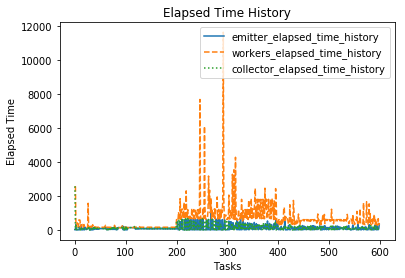

In [101]:
# plot emitter, workers and collector elapsed time history
results_df.plot(y=['emitter_elapsed_time_history','workers_elapsed_time_history','collector_elapsed_time_history'],
                style=['-', '--', ':'])
plt.ylabel('Elapsed Time')
plt.xlabel('Tasks')
plt.title('Elapsed Time History')
plt.show()

### Completion Time

In [102]:
tc_vs_nw_df = pd.read_csv('../Statistics/completion_time_vs_nw.csv')
tc_vs_nw_df.head()

,nw,completion_time
0,1,200912
1,2,110323
2,3,77423
3,4,69310
4,5,68427


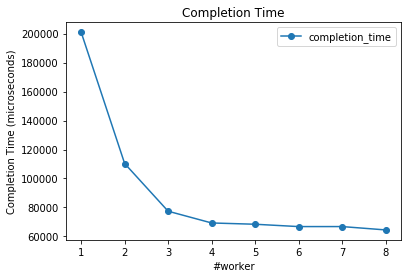

In [103]:
tc_vs_nw_df.plot(x='nw', y='completion_time', style='-o')
plt.xlabel('#worker')
plt.ylabel('Completion Time (microseconds)')
plt.title('Completion Time')
plt.show()

### Scalability

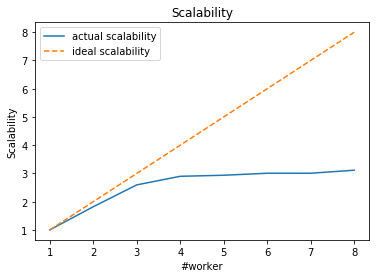

In [104]:
# scalability
tc = tc_vs_nw_df['completion_time']
nw = tc_vs_nw_df['nw']

scalability = [tc[0]/float(t) for t in tc]

plt.plot(nw, scalability, linestyle='-', label='actual scalability')
plt.plot(nw, nw, linestyle='--', label='ideal scalability')
plt.legend(loc='best')
plt.xlabel('#worker')
plt.ylabel('Scalability')
plt.title('Scalability')
plt.show()

### Speedup

In [105]:
# speedup
sequential_time = pd.read_csv('../Statistics/sequential_time.csv')
sequential_time

,sequential_time
0,164586


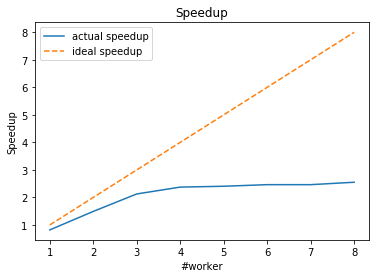

In [106]:
tseq = sequential_time['sequential_time']
speedup = [tseq/float(t) for t in tc]

plt.plot(nw, speedup, linestyle='-', label='actual speedup')
plt.plot(nw, nw, linestyle='--', label='ideal speedup')
plt.legend(loc='best')
plt.xlabel('#worker')
plt.ylabel('Speedup')
plt.title('Speedup')
plt.show()

### Alpha
- colonna 1: alpha
- colonna 2: ts_goal
- colonna 3-fine: service_time_history

In [116]:
ts_vs_alpha_df = pd.read_csv("../Statistics/service_time_history_vs_alpha.csv", header=None)
ts_vs_alpha_df.head()

,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,600,601
0,0.05,100,57,224,109,107,104,102,100,98,...,92,90,106,104,101,106,64,63,65,71
1,0.10,100,119,226,84,98,93,90,85,113,...,115,114,110,109,109,106,105,105,38,40
2,0.15,100,88,164,100,92,85,81,112,108,...,94,97,94,95,93,94,95,93,36,45
3,0.20,100,88,170,100,91,84,76,106,107,...,94,93,104,104,101,101,115,109,40,50
4,0.25,100,130,152,75,80,94,92,82,113,...,99,94,99,94,96,99,94,95,36,49


- prova per n differenti

[]

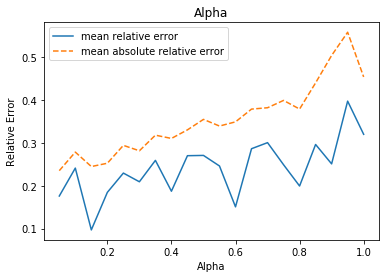

In [129]:
#ts_vs_alpha_df.loc[0, 1:]
alpha_values = ts_vs_alpha_df.loc[:,0]
ts_goal = ts_vs_alpha_df.loc[0,1]

ts_histories = np.array(ts_vs_alpha_df.loc[:, 2:])
n_alpha, n_tasks = ts_histories.shape

ts_goal = np.full((n_tasks),ts_goal)

rel_errors = np.array([(ts - ts_goal)/ts_goal for ts in ts_histories])

mean_rel_error = np.mean(rel_errors, 1)
mean_abs_rel_error = np.mean(np.abs(rel_errors), 1)

plt.plot(alpha_values, mean_rel_error, label='mean relative error', linestyle='-')
plt.plot(alpha_values, mean_abs_rel_error, label='mean absolute relative error', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Alpha')
plt.ylabel('Relative Error')
plt.title('Alpha')
plt.plot()